# 第3.4节实验2从零实现多分类逻辑回归

## 实验介绍

在本节实验中，我们将详细介绍如何在二分类逻辑回归基础上实现多分类的逻辑回归模型。

### 知识点

- 多分类逻辑回归实现

## 1. 载入数据集及特征标准化

In [2]:
from sklearn.datasets import load_iris
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
import numpy as np
import matplotlib.pyplot as plt


def feature_scalling(X):
    mean = X.mean(axis=0)
    std = X.std(axis=0)
    return (X - mean) / std

def load_data():
    data = load_iris()
    x, y = data.data, data.target.reshape(-1, 1)
    x = feature_scalling(x)
    return x, y

## 2. Sigmoid及导数

In [3]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def sigmoid_prime(z):
    return sigmoid(z) * (1 - sigmoid(z))

## 3. 假设函数及预测函数

In [37]:
def hypothesis(X, W, bias):
    z = np.matmul(X, W) + bias
    h_x = sigmoid(z)
    return h_x


def prediction(X, W, bias):
    class_type = len(W)
    prob = []
    for c in range(class_type):
        w, b = W[c], bias[c]
        h_x = hypothesis(X, w, b)
        prob.append(h_x)
    prob = np.hstack(prob)
    y_pre = np.argmax(prob, axis=1)
    return y_pre


## 4. 目标函数与梯度下降

In [30]:
def cost_function(X, y, W, bias):
    m, n = X.shape
    h_x = hypothesis(X, W, bias)
    cost = np.sum(y * np.log(h_x) + (1 - y) * np.log(1 - h_x))
    return -cost / m


def gradient_descent(X, y, W, bias, alpha):
    m, n = X.shape
    h_x = hypothesis(X, W, bias)
    grad_w = (1 / m) * np.matmul(X.T, (h_x - y))  # [n,m] @ [m,1]
    grad_b = (1 / m) * np.sum(h_x - y)
    W = W - alpha * grad_w  # 梯度下降
    bias = bias - alpha * grad_b
    return W, bias

def accuracy(y, y_pre):
    return np.mean((y.flatten() == y_pre.flatten()) * 1)

## 5. 模型训练

In [31]:
def train_binary(X, y, iter=200):
    m, n = X.shape  # 506,13
    W = np.random.randn(n, 1)  # 0.953
    b, alpha, costs = 0.3, 0.5, []
    for i in range(iter):
        costs.append(cost_function(X, y, W, b))
        W, b = gradient_descent(X, y, W, b, alpha)
    return costs, W, b

def train(x, y, iter=1000):
    class_type = np.unique(y)
    costs, W, b = [], [], []
    for c in class_type:
        label = (y == c) * 1
        tmp = train_binary(x, label, iter=iter)
        costs.append(tmp[0])
        W.append(tmp[1])
        b.append(tmp[2])
    costs = np.vstack(costs)
    costs = np.sum(costs, axis=0)
    y_pre = prediction(x, W, b)
    print(classification_report(y, y_pre))
    print('Accuracy by impleme: ', accuracy(y, y_pre))
    return costs

def train_by_sklearn(x, y):
    model = LogisticRegression(multi_class='ovr')
    model.fit(x, y.ravel())
    print("Accuracy by sklearn: ", model.score(x, y))

## 6. 运行

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.94      0.94      0.94        50
           2       0.94      0.94      0.94        50

    accuracy                           0.96       150
   macro avg       0.96      0.96      0.96       150
weighted avg       0.96      0.96      0.96       150

Accuracy by impleme:  0.96
Accuracy by sklearn:  0.9466666666666667


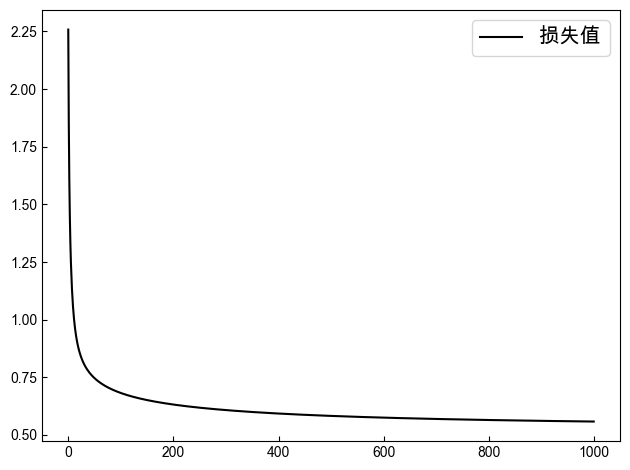

In [40]:

if __name__ == '__main__':
    x, y = load_data()
    costs = train(x, y)
    train_by_sklearn(x, y)
    plt.rcParams['ytick.direction'] = 'in'  # 刻度向内
    plt.rcParams['xtick.direction'] = 'in'  # 刻度向内
    plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']
    plt.plot(range(len(costs)), costs, label='损失值', c='black')
    plt.legend(fontsize=15)
    # plt.rcParams['font.sans-serif'] = ['SimHei']  # 指定默认字体
    plt.tight_layout()  # 调整子图间距
    plt.show()

## 实验总结

在本节实验中，我们详细介绍了如何从零实现多分类场景下的逻辑回归模型，即以OVR的策略来对每个分类类别建立一个逻辑回归模型。